In [1]:
import pandas as pd

import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt

In [2]:
env_data_dr = "./data/"

### Loading the dataset constructed as presented in the notebook WeatherTideDigitalTwinDatasetCreation
### combining data from https://power.larc.nasa.gov/data-access-viewer/ and https://www.bodc.ac.uk/data/hosted_data_systems/sea_level/uk_tide_gauge_network/processed/#MyRequest

In [3]:
ds = pd.read_csv(env_data_dr+"WeatherTide_digitaltwin_1h.csv")

In [4]:
class UseEnvDigitalTwin:
    '''
    A class to use the Environment (tide+weather) digital twin for Portsmouth Harbour for scientific analysis.

    Args:
    ds (dataframe): complete dataframe - create it with the example notebook or download it from this repository
    year (array of int): year(s) of interest - if not set, covers 2001-2024
    month (array of int): month(s) of interest -if not set, covers all months
    day (array of int): day(s) of interest - if not set, covers all days
    hour (array of int): hour(s) of interest - if not set, covers entire day 
    '''
    def __init__(self, ds, year = np.arange(2001,2024), month = np.arange(1,32), day = np.arange(1,32), hour = np.arange(0,25)):
        self.ds = ds
        self.year = year
        self.month = month
        self.day = day
        self.hour = hour
        
    def query_columndefintion(self, column_name= []):

        """
        Given a dataset and a column name, returns the definition of that column.

        Parameters:
        delf.ds (dataframe): complete EnvDigitalTwin dataset
        column_name (str): The name of the column for which to retrieve the definition.

        Returns:
        str: The definition of the specified column, or a message if the column doesn't exist.
        
        Flags:
        **inputing more than a string**
        """
        
        ds = self.ds
        column_definitions = {
             'date': 'date when values are collected/computed',
        'ALLSKY_KT' : 'CERES SYN1deg All Sky Insolation Clearness Index (dimensionless) ',
        'ALLSKY_SFC_UVA' : 'CERES SYN1deg All Sky Surface UVA Irradiance (W/m^2)',
        'ALLSKY_SFC_UVB' : 'CERES SYN1deg All Sky Surface UVB Irradiance (W/m^2)',
        'ALLSKY_SFC_UV_INDEX' : 'CERES SYN1deg All Sky Surface UV Index (dimensionless)',
        'T2M' : 'MERRA-2 Temperature at 2 Meters (C)',
        'QV2M' : 'MERRA-2 Specific Humidity at 2 Meters (g/kg)',
        'PRECTOTCORR': 'MERRA-2 Precipitation Corrected (mm/hour)',
        'PS' : 'MERRA-2 Surface Pressure (kPa)',
        'WS10M' : ' MERRA-2 Wind Speed at 10 Meters (m/s)',
        'WD10M' : ' MERRA-2 Wind Direction at 10 Meters (Degrees)',
        'WS50M' : ' MERRA-2 Wind Speed at 50 Meters (m/s)',
        'WD50M' : ' MERRA-2 Wind Direction at 50 Meters (Degrees)',
             'value': 'Surface elevation (unspecified datum) of the water body by bubbler tide gauge',
             'error': 'residual of Surface elevation (unspecified datum) of the water body by bubbler tide gauge',
        }
        
    
        if column_name in list(ds.columns):
            # Return the definition from the dictionary
            return column_definitions.get(column_name, "Definition not found.")
        else:
            return f"Column '{column_name}' not found in the dataset."
        
    def obtain_subset_given_timeframe(self):
        """
        Return DigitalTwin dataset in the time-frame of interest

        Args:
        self.ds (dataframe): complete dataset
        self.year (array of int): year(s) of interest - if not set, covers 2001-2024
        self.month (array of int): month(s) of interest -if not set, covers all months
        self.day (array of int): day(s) of interest - if not set, covers all days
        self.hour (array of int): hour(s) of interest - if not set, covers entire day 
        Returns:
        dataframe subset
        """
        ds = self.ds
        ds["date"] = pd.to_datetime(ds["date"])
        return(ds[(ds["date"].dt.year.isin(self.year))&(ds["date"].dt.month.isin(self.month))\
                  &(ds["date"].dt.day.isin(self.day))&(ds["date"].dt.hour.isin(self.hour))])   
    
    def covariance(self, columns=[]):
        """
        Return covariance amongst the columns of interest

        Args:
        self.ds (dataframe): complate dataset
        columns (array of str): columns of interset. If not set, al columns are considered. 
        self.year (array of int): year(s) of interest
        slf.month (array of int): month(s) of interest
        self.day (array of int): day(s) of interest
        self.hour (array of int): hour(s) of interest, if not set, entire day is returned

        Returns:
        plot covariance matrix
        
        Flags:
        ** at least three columns required **
        
        """
        if columns == []:

            columns = self.ds.drop("date", axis=1).columns
        
        if len(columns)<3:
            return f"input at least 3 column"
        else:
            ds = self.obtain_subset_given_timeframe()[columns]
            corrmat = ds.astype(float).corr().dropna(how="all", axis="columns").dropna(how="all", axis="rows")
            f, ax = plt.subplots( figsize=(15, 15))
            fig = sns.heatmap(corrmat, vmax=1, square=True, cmap="RdBu",  annot=True, vmin=-1);

            return plt.show()
    
    def time_series(self, column ):
        """
        Return time vs column of interest plot, in the timeframe of interest

        Args:
        self.ds (dataframe): complate dataset
        column (str): column of interset.
        self.year (array of int): year(s) of interest
        self.month (array of int): month(s) of interest
        self.day (array of int): day(s) of interest
        self.hour (array of int): hour(s) of interest, if not set, entire day is returned

        Returns:
        plot time vs column of interest
        """
        plt.plot(self.ds.date, self.ds[column])
        plt.xlabel("time")
        plt.ylabel(column)
        plt.show()




# Example of how to use the functions:

In [5]:
ds.head()

,date,ALLSKY_KT,ALLSKY_SFC_UVA,ALLSKY_SFC_UVB,ALLSKY_SFC_UV_INDEX,T2M,QV2M,PRECTOTCORR,PS,WS10M,WD10M,WS50M,WD50M,value,error
0,2001-01-01 00:00:00,-999.0,0.0,0.0,0.0,9.87,7.14,0.51,99.01,14.65,185.78,18.14,188.02,3.46275,0.56225
1,2001-01-01 01:00:00,-999.0,0.0,0.0,0.0,10.45,7.45,0.23,98.94,13.76,187.93,17.23,189.74,4.09650,0.51400
2,2001-01-01 02:00:00,-999.0,0.0,0.0,0.0,10.75,7.63,0.47,98.88,12.99,188.89,16.42,190.39,4.47800,0.39975
3,2001-01-01 03:00:00,-999.0,0.0,0.0,0.0,11.05,7.75,1.04,98.85,13.32,195.02,16.85,196.54,4.37225,0.18425
4,2001-01-01 04:00:00,-999.0,0.0,0.0,0.0,11.29,7.81,0.41,98.86,12.63,202.79,16.02,203.85,4.18950,0.11525


## You can query the meaning for each column present in the dataset

In [6]:
UseEnvDigitalTwin(ds).query_columndefintion(column_name="value")

'Surface elevation (unspecified datum) of the water body by bubbler tide gauge'

In [7]:
UseEnvDigitalTwin(ds).query_columndefintion(column_name="ALLSKY_SFC_UVB")

'CERES SYN1deg All Sky Surface UVB Irradiance (W/m^2)'

## You can obtain a subset considering only a given timeframe of interest

### you can consider only certain years for example

In [8]:
UseEnvDigitalTwin(ds, year=np.arange(2012,2017)).obtain_subset_given_timeframe() 

,date,ALLSKY_KT,ALLSKY_SFC_UVA,ALLSKY_SFC_UVB,ALLSKY_SFC_UV_INDEX,T2M,QV2M,PRECTOTCORR,PS,WS10M,WD10M,WS50M,WD50M,value,error
96408,2012-01-01 00:00:00,-999.0,0.0,0.0,0.0,11.74,8.06,0.32,101.16,8.82,224.93,11.66,226.14,2.41050,0.00225
96409,2012-01-01 01:00:00,-999.0,0.0,0.0,0.0,11.73,8.06,0.33,101.15,8.65,227.86,11.40,228.64,2.94525,0.11675
96410,2012-01-01 02:00:00,-999.0,0.0,0.0,0.0,11.66,8.06,0.27,101.14,8.08,228.45,10.76,228.88,3.61175,0.14675
96411,2012-01-01 03:00:00,-999.0,0.0,0.0,0.0,11.66,8.06,0.27,101.12,7.68,227.97,10.43,228.46,4.15150,0.15725
96412,2012-01-01 04:00:00,-999.0,0.0,0.0,0.0,11.63,8.06,0.38,101.08,7.32,225.56,10.05,226.17,4.27725,0.11075
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140251,2016-12-31 19:00:00,-999.0,0.0,0.0,0.0,10.00,5.80,0.01,102.72,4.52,243.88,5.13,245.04,1.53500,-0.06450
140252,2016-12-31 20:00:00,-999.0,0.0,0.0,0.0,10.06,5.86,0.00,102.65,5.05,245.89,5.78,246.83,1.93075,-0.05675
140253,2016-12-31 21:00:00,-999.0,0.0,0.0,0.0,10.12,5.98,0.01,102.59,5.53,247.24,6.38,248.06,2.24900,-0.05175
140254,2016-12-31 22:00:00,-999.0,0.0,0.0,0.0,10.17,6.16,0.01,102.51,6.02,245.93,6.97,246.89,2.95075,-0.07575


### you can select only a month, for example

In [9]:
UseEnvDigitalTwin(ds, month=[10]).obtain_subset_given_timeframe() 

,date,ALLSKY_KT,ALLSKY_SFC_UVA,ALLSKY_SFC_UVB,ALLSKY_SFC_UV_INDEX,T2M,QV2M,PRECTOTCORR,PS,WS10M,WD10M,WS50M,WD50M,value,error
6552,2001-10-01 00:00:00,-999.0,0.0,0.0,0.0,17.97,11.78,1.18,99.97,13.69,217.88,16.95,218.71,4.23750,0.30700
6553,2001-10-01 01:00:00,-999.0,0.0,0.0,0.0,17.78,11.72,0.79,100.00,10.65,231.37,13.47,231.97,3.52125,0.31750
6554,2001-10-01 02:00:00,-999.0,0.0,0.0,0.0,17.51,11.11,1.14,100.02,9.64,244.58,12.35,245.45,2.31050,0.25675
6555,2001-10-01 03:00:00,-999.0,0.0,0.0,0.0,17.09,10.56,0.53,100.06,9.17,244.57,11.62,245.71,1.42675,0.19650
6556,2001-10-01 04:00:00,-999.0,0.0,0.0,0.0,16.74,10.31,0.11,100.07,8.80,234.28,11.00,235.44,1.54125,0.25400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200131,2023-10-31 19:00:00,-999.0,0.0,0.0,0.0,15.04,9.83,0.34,99.69,8.91,194.68,11.00,195.54,1.96225,0.40675
200132,2023-10-31 20:00:00,-999.0,0.0,0.0,0.0,15.05,9.95,0.42,99.63,9.80,184.94,11.88,185.58,2.40350,0.40825
200133,2023-10-31 21:00:00,-999.0,0.0,0.0,0.0,15.06,9.95,0.50,99.55,11.55,180.54,14.24,182.23,2.72250,0.39725
200134,2023-10-31 22:00:00,-999.0,0.0,0.0,0.0,15.10,10.01,0.62,99.42,13.35,179.50,16.21,181.10,3.42675,0.39225


## It's possible to investigate the correlation amongst the quantities in the dataset, in any given timeframe of interest

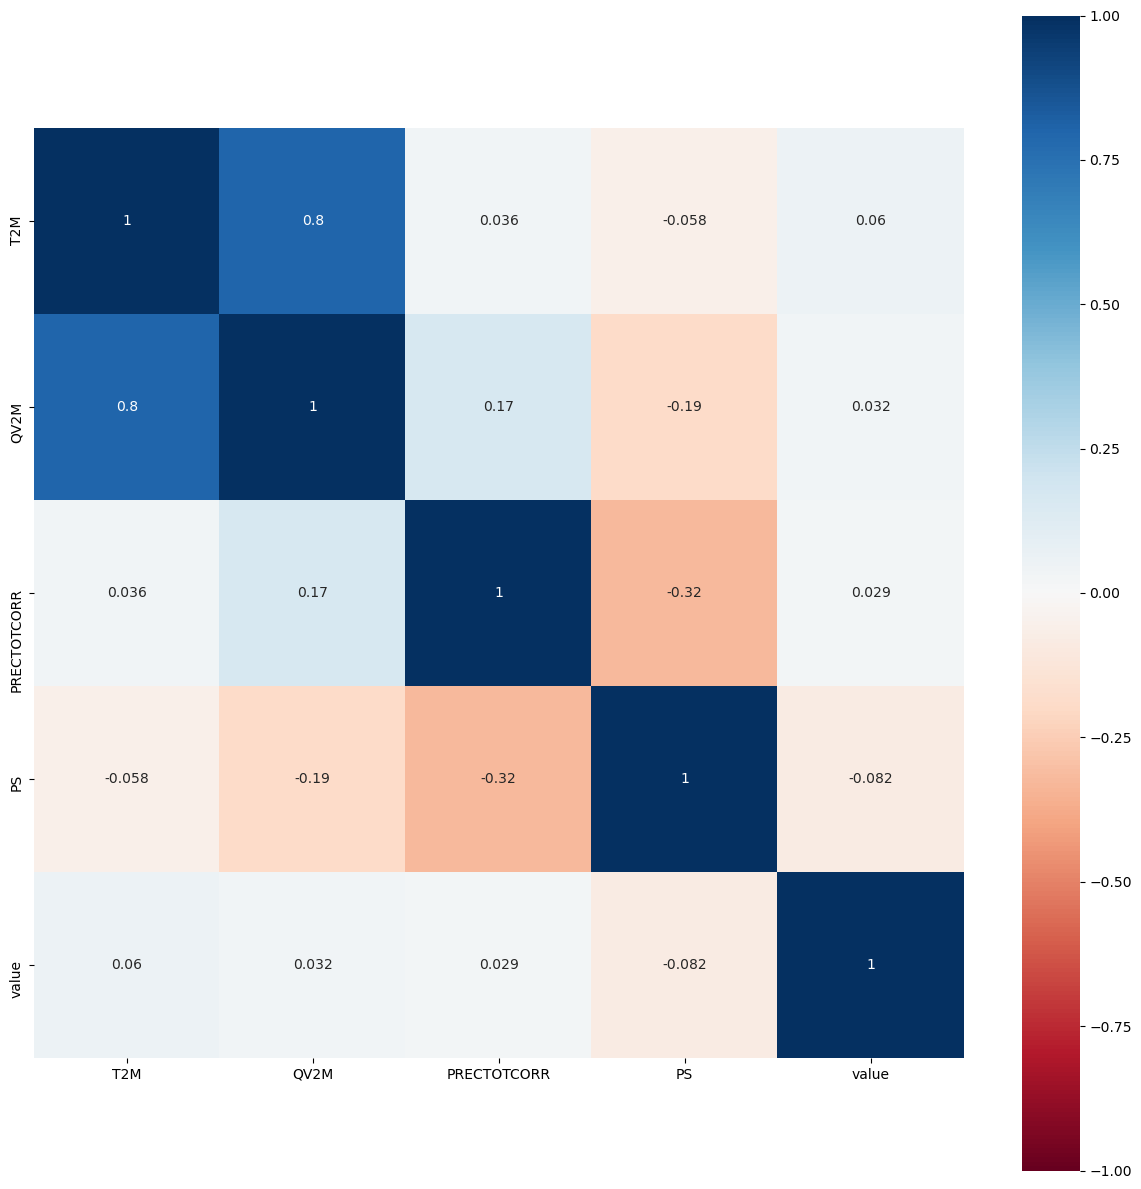

In [10]:
UseEnvDigitalTwin(ds, month=[10]).covariance(columns = ["T2M","QV2M", "PRECTOTCORR", "PS", "value"] ) 

### If no timeframe is set, the entire dataset is considered

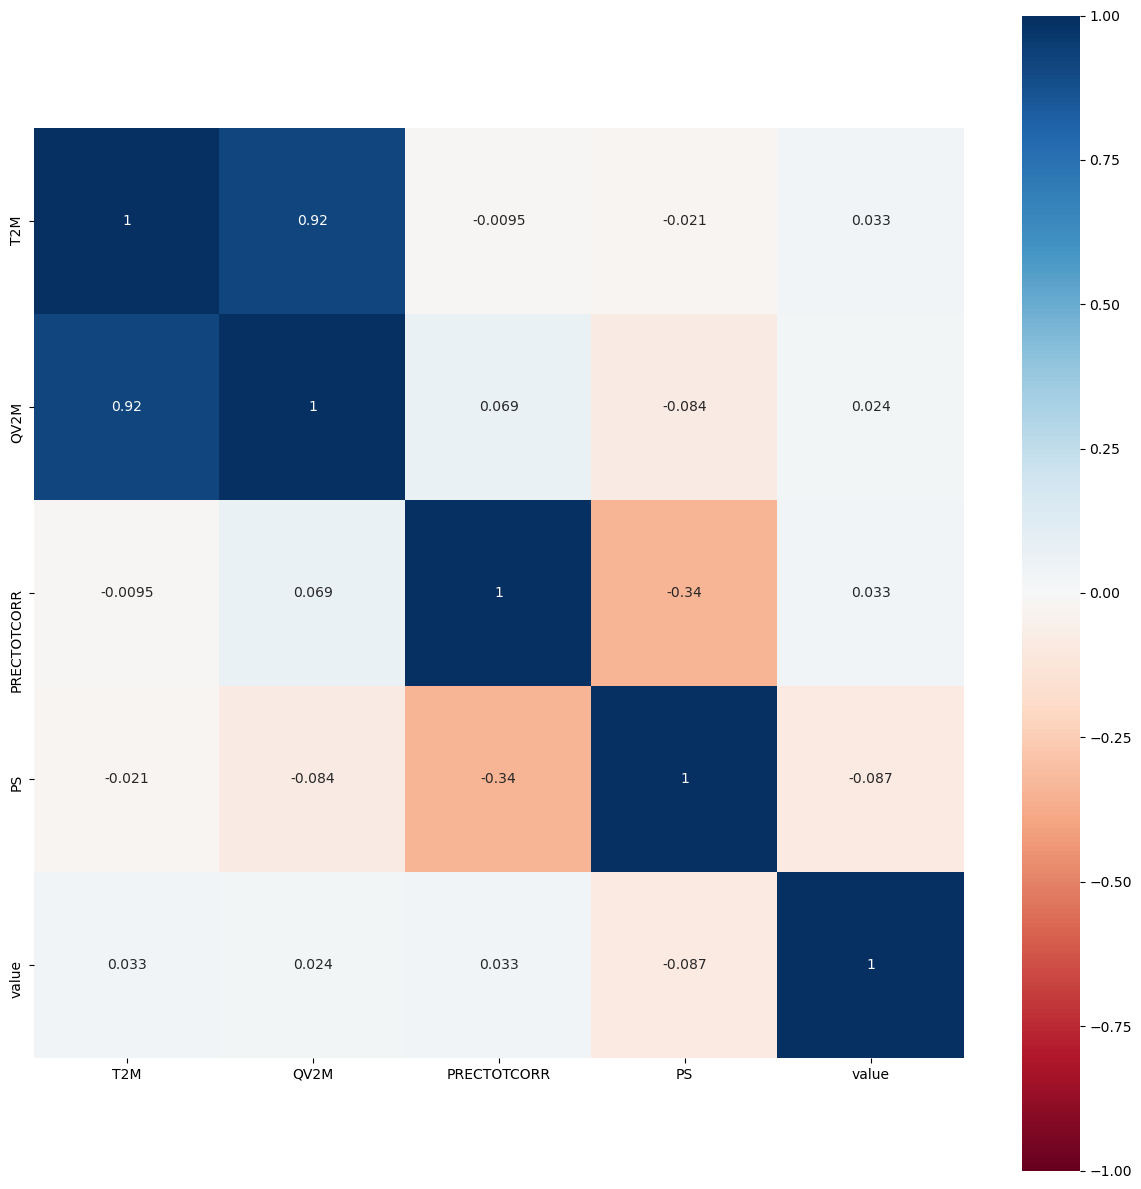

In [11]:
UseEnvDigitalTwin(ds, ).covariance(columns = ["T2M","QV2M", "PRECTOTCORR", "PS", "value"] ) 

## We can plot  time vs quantity, for any timeframe

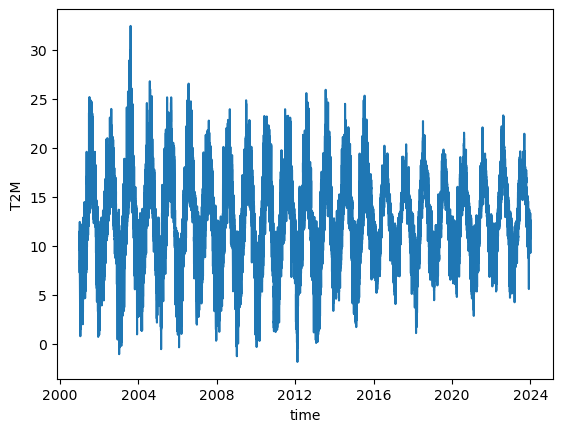

In [12]:
UseEnvDigitalTwin(ds, ).time_series(column = "T2M") 